# Theory/Computation Problems

### Problem 1 (20 points) 
Show that the stationary point (zero gradient) of the function
$$
\begin{aligned}
    f=2x_{1}^{2} - 4x_1 x_2+ 1.5x^{2}_{2}+ x_2
\end{aligned}
$$
is a saddle (with indefinite Hessian). Find the directions of downslopes away from the saddle. Hint: Use Taylor's expansion at the saddle point. Find directions that reduce $f$.

![HW2P1A](img/HW2P1A.jpg)
![HW2P1B](img/HW2P1B.jpg)

### Problem 2 (50 points) 

* (10 points) Find the point in the plane $x_1+2x_2+3x_3=1$ in $\mathbb{R}^3$ that is nearest to the point $(-1,0,1)^T$. Is this a convex problem? Hint: Convert the problem into an unconstrained problem using $x_1+2x_2+3x_3=1$.

* (40 points) Implement the gradient descent and Newton's algorithm for solving the problem. Attach your codes along with a short summary including (1) the initial points tested, (2) corresponding solutions, (3) a log-linear convergence plot.

![HW2P2](img/HW2P2.jpg)

In [7]:
# sample code for Problem 2
import numpy as np
from matplotlib import pyplot as plt

# x[1] corresponds to x2 and x[2] with x3
obj = lambda x: (5*x[0]**2+12*x[0]*x[1]-8*x[0]+10*x[1]**2-14*x[1]+5)
def grad(x):
    return [10*x[0]+12*x[1]-8, 12*x[0]+20*x[1]-14] #x[0] corresponds to x2 and x[1] corresponds to x3


eps = 1e-3  # termination criterion
x0 = [0., 0.]  # initial guess
k = 0  # counter
soln = [x0]  # use an array to store the search steps
x = soln[k]  # start with the initial guess

error = np.linalg.norm(grad(x))  # compute the error. Note you will need to compute the norm for 2D grads, rather than the absolute value
a = 0.01  # set a fixed step size to start with

# Armijo line search
# def line_search(x):
#     a = 1.  # initialize step size
#     phi = lambda a, x: obj(x) - a*0.8*grad(x)**2  # define phi as a search criterion
#     while phi(a,x)<obj(x-a*grad(x)):  # if f(x+a*d)>phi(a) then backtrack. d is the search direction
#         a = 0.5*a
#     return a

while error >= eps:  # keep searching while gradient norm is larger than eps
#     a = line_search(x)
    x = np.array(x) - a*np.array(grad(x))
    soln.append(x)
    error = np.linalg.norm(grad(x))
soln  # print the search trajectory

[[0.0, 0.0],
 array([0.04, 0.07]),
 array([0.0738, 0.1306]),
 array([0.102274, 0.183112]),
 array([0.12617358, 0.22866436]),
 array([0.14614504, 0.26822751]),
 array([0.16274414, 0.30263606]),
 array([0.17644877, 0.3326078 ]),
 array([0.18766986, 0.3587601 ]),
 array([0.19676076, 0.38162389]),
 array([0.20402529, 0.40165586]),
 array([0.20972467, 0.41924876]),
 array([0.21408351, 0.4347404 ]),
 array([0.21729491, 0.44842135]),
 array([0.21952489, 0.46054152]),
 array([0.22091615, 0.47131587]),
 array([0.22159139, 0.48092932]),
 array([0.22165606, 0.4895409 ]),
 array([0.22120081, 0.49728745]),
 array([0.22030352, 0.50428666]),
 array([0.21903114, 0.51063978]),
 array([0.2174412 , 0.51643393]),
 array([0.2155831 , 0.52174407]),
 array([0.2134993 , 0.52663467]),
 array([0.21122626, 0.53116125]),
 array([0.20879527, 0.53537155]),
 array([0.20623321, 0.53930668]),
 array([0.20356315, 0.54300202]),
 array([0.20080487, 0.54648803]),
 array([0.19797535, 0.54979093]),
 array([0.19508913, 0.552

when a = 0.005, [-0.1424426 ,  0.78543792]\
when a = 0.01, [-0.14244893,  0.78544215]\
when a = 0.05, [-0.14246045,  0.78544982]

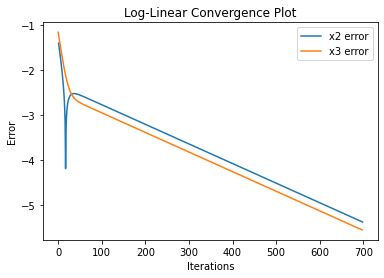

In [9]:
# create arrays to store the iteration errors
errc1 = np.asarray([]) #difference between current and last iteration of x2
errc2 = np.asarray([]) #difference between current and last iteration of x3

for i in range(1, np.size(soln,0)): #start at 1 to compare with 0th index
    converge_error = np.array(soln[i]) - np.array(soln[i-1])
    errc1 = np.append(errc1, converge_error[0]) #append the convergence error onto errc1
    errc2 = np.append(errc2, converge_error[1]) #append the convergence error onto errc2
    
iterations = list(range(1,np.size(soln,0))) #array to plot iteration

errc1 = np.log10(np.absolute(errc1))
errc2 = np.log10(np.absolute(errc2))
    
plt.title("Log-Linear Convergence Plot")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.plot(iterations,errc1,errc2)
plt.legend(["x2 error", "x3 error"])
plt.show()

### Problem 3 (10 points) 
Let $f(x)$ and $g(x)$ be two convex functions defined on the convex set $\mathcal{X}$. 
* (5 points) Prove that $af(x)+bg(x)$ is convex for $a>0$ and $b>0$. 
* (5 points) In what conditions will $f(g(x))$ be convex?

![HW2P3](img/HW2P3.jpg)

### Problem 4 (bonus 10 points)
Show that $f({\bf x}_1) \geq f(\textbf{x}_0) + 
    \textbf{g}_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0)$ for a convex function $f(\textbf{x}): \mathcal{X} \rightarrow \mathbb{R}$ and for $\textbf{x}_0$, $\textbf{x}_1 \in \mathcal{X}$. 
    
![HW2P4](img/HW2P4.jpg)

# Design Problems

### Problem 5 (20 points) 
Consider an illumination problem: There are $n$ lamps and $m$ mirrors fixed to the ground. The target reflection intensity level is $I_t$. The actual reflection intensity level on the $k$th mirror can be computed as $\textbf{a}_k^T \textbf{p}$, where $\textbf{a}_k$ is given by the distances between all lamps to the mirror, and $\textbf{p}:=[p_1,...,p_n]^T$ are the power output of the lamps. The objective is to keep the actual intensity levels as close to the target as possible by tuning the power output $\textbf{p}$.

* (5 points) Formulate this problem as an optimization problem. 
* (5 points) Is your problem convex?
* (5 points) If we require the overall power output of any of the $n$ lamps to be less than $p^*$, will the problem have a unique solution?
* (5 points) If we require no more than half of the lamps to be switched on, will the problem have a unique solution?

![HW2P5](img/HW2P5.jpg)

# Note

For this homework, you may want to attach sketches as means to explain your ideas. Here is how you can attach images.

![everly1](img/everly7.jpg)